In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
from matplotlib import pyplot as plt
%matplotlib inline

In [224]:
import seaborn as sns

In [10]:
import numpy as np 
from numpy import random
import scipy.stats as stats
import os
import json
import scipy
import copy 
import scipy.sparse as sparse
from scipy.special import digamma
import time

In [11]:
from matrix_factorization import read

In [12]:
from nonparametric import simulate, NPNMF

In [377]:
X, theta, beta, s, v = simulate(U = 100,
    D = 30,
    K = 10,
    alpha=1.1,
    beta_shape_prior=0.3,
    beta_rate_prior=0.3,
    s_rate_prior=1.1)

In [378]:
X = scipy.sparse.csr_matrix(X)

In [379]:
nmf = NPNMF(X ,T = 15, seed = 1, threshold = 1e-4, max_iter = 100)
#nmf.ELBO()

Using fixed seed 1


In [380]:
nmf.inference()

Iter 1: Update phi = 0.25638461112976074
Iter 1: Update user stick = 2.3122448921203613
Iter 1: Update user stick scalar = 0.043340206146240234
Iter 1: Update items = 0.6269738674163818
Iter 1: ELBO = 4174.8183110642385, last_ELBO = 0
Iter 2: Update phi = 0.25196170806884766
Iter 2: Update user stick = 2.3077611923217773
Iter 2: Update user stick scalar = 0.04228925704956055
Iter 2: Update items = 0.6219770908355713
Iter 2: ELBO = 4815.9452299191435, last_ELBO = 4174.8183110642385
Iter 3: Update phi = 0.2505171298980713
Iter 3: Update user stick = 2.2979462146759033
Iter 3: Update user stick scalar = 0.04378223419189453
Iter 3: Update items = 0.6192359924316406
Iter 3: ELBO = 4876.294226185519, last_ELBO = 4815.9452299191435
Iter 4: Update phi = 0.24766039848327637
Iter 4: Update user stick = 2.355198383331299
Iter 4: Update user stick scalar = 0.04427170753479004
Iter 4: Update items = 0.6151633262634277
Iter 4: ELBO = 4850.306288848058, last_ELBO = 4876.294226185519
Iter 5: Update ph

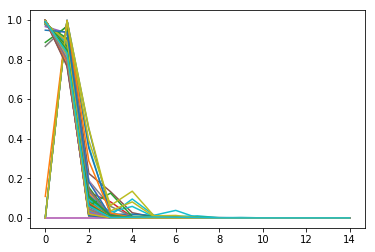

In [382]:
#check if stick breaking is working!
plt.plot(nmf._v.T)
plt.show()

In [383]:
theta = np.array([[nmf._s_shape[u]/nmf._s_rate[u] * nmf._v[u,k] *np.prod(1-nmf._v[u,:k]) for k in range(nmf.T)] for u in range(nmf.U)])

In [384]:
theta

array([[6.75075676e+00, 1.48876946e-02, 3.82150796e-04, ...,
        3.45589283e-13, 5.09054704e-11, 1.98110716e-11],
       [1.05003923e+01, 1.55582565e-02, 9.09963736e-05, ...,
        2.60428516e-12, 6.38414422e-13, 6.38414442e-13],
       [2.24925594e+00, 1.77816583e-02, 3.29974059e-04, ...,
        2.27932949e-10, 8.50164118e-11, 5.16779922e-10],
       ...,
       [5.06311281e+00, 1.40627161e-02, 1.60154367e-04, ...,
        1.29326693e-09, 8.44284373e-11, 3.18650441e-10],
       [1.38733280e+01, 2.20154236e-02, 9.15128553e-05, ...,
        4.56800716e-13, 4.56800716e-13, 4.56800716e-13],
       [2.43702364e+00, 1.66162754e-02, 2.00831811e-04, ...,
        9.54217467e-09, 1.80475156e-08, 2.30039599e-09]])

In [386]:
theta.shape

(100, 15)

In [387]:
nmf._phi[1,2,:]

array([9.97804885e-01, 1.45391481e-03, 8.64651569e-06, 3.02568144e-06,
       4.96531549e-08, 2.22875935e-09, 9.43856288e-11, 7.27753709e-12,
       2.78959422e-13, 1.75137928e-12, 6.11423305e-14, 7.43183476e-14,
       2.49418076e-13, 6.11423431e-14, 6.11423450e-14])

In [388]:
nmf._phi[1,4,:]

array([9.97804885e-01, 1.45391481e-03, 8.64651569e-06, 3.02568144e-06,
       4.96531549e-08, 2.22875935e-09, 9.43856288e-11, 7.27753709e-12,
       2.78959422e-13, 1.75137928e-12, 6.11423305e-14, 7.43183476e-14,
       2.49418076e-13, 6.11423431e-14, 6.11423450e-14])

In [389]:
nmf._beta_rate

array([[652.25910585, 570.63386481, 563.01621935, 563.00331752,
        563.00236716, 563.00164266, 563.00163849, 563.00155714,
        563.00151305, 563.00150994, 563.00150426, 563.00150213,
        563.00150118, 563.00150036, 563.0015001 ],
       [652.25910585, 570.63386481, 563.01621935, 563.00331752,
        563.00236716, 563.00164266, 563.00163849, 563.00155714,
        563.00151305, 563.00150994, 563.00150426, 563.00150213,
        563.00150118, 563.00150036, 563.0015001 ],
       [652.25910585, 570.63386481, 563.01621935, 563.00331752,
        563.00236716, 563.00164266, 563.00163849, 563.00155714,
        563.00151305, 563.00150994, 563.00150426, 563.00150213,
        563.00150118, 563.00150036, 563.0015001 ],
       [652.25910585, 570.63386481, 563.01621935, 563.00331752,
        563.00236716, 563.00164266, 563.00163849, 563.00155714,
        563.00151305, 563.00150994, 563.00150426, 563.00150213,
        563.00150118, 563.00150036, 563.0015001 ],
       [652.25910585, 570.63

In [390]:
beta = nmf._beta_shape/nmf._beta_rate

In [391]:
beta

array([[2.25110106e-01, 1.13290598e-03, 5.39972808e-04, 5.33317182e-04,
        5.32933654e-04, 5.32904963e-04, 5.32895850e-04, 5.32884793e-04,
        5.32861890e-04, 5.32860373e-04, 5.32859049e-04, 5.32858657e-04,
        5.32858519e-04, 5.32858350e-04, 5.32858312e-04],
       [9.81532440e-02, 9.24100670e-04, 5.38150040e-04, 5.33144368e-04,
        5.32900282e-04, 5.32887338e-04, 5.32878774e-04, 5.32870557e-04,
        5.32862912e-04, 5.32859812e-04, 5.32860959e-04, 5.32858706e-04,
        5.32858300e-04, 5.32858301e-04, 5.32858318e-04],
       [1.94482798e-01, 1.12214203e-03, 5.40035713e-04, 5.33286185e-04,
        5.32954706e-04, 5.32882834e-04, 5.32872824e-04, 5.32866865e-04,
        5.32861485e-04, 5.32859189e-04, 5.32858997e-04, 5.32858452e-04,
        5.32858355e-04, 5.32858347e-04, 5.32858401e-04],
       [6.21726903e-01, 4.83027889e-03, 5.70793520e-04, 5.36929253e-04,
        5.34067717e-04, 5.33066324e-04, 5.33006918e-04, 5.32958947e-04,
        5.32888973e-04, 5.32875729e-0

In [392]:
poisson_mean = theta @ beta.T
poisson_mean[X.toarray() == 0] = 0
simulated = np.random.poisson(poisson_mean)

In [393]:
simulated

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 3, 2, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [5, 4, 2, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 0]])

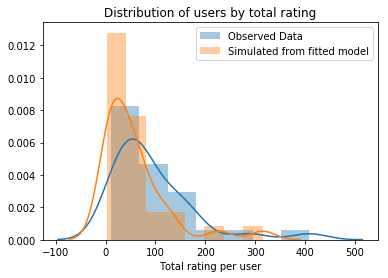

In [395]:
#posterior check

ax = sns.distplot(np.sum(X,0),hist=True, kde=True)
sns.distplot(np.sum(simulated,0),hist=True, kde=True)
ax.set_title('Distribution of users by total rating')
ax.set(xlabel='Total rating per user')
ax.legend(['Observed Data', 'Simulated from fitted model'])

In [192]:
temp = [np.sum([nmf.X[u,d] * (1 - np.sum(nmf._phi[u,d,:])) for d in range(nmf.D)]) for u in range(nmf.U)]

In [194]:
min(temp)

0.0

In [165]:
nmf.inference()

Iter 1: Update phi = 3.0657150745391846
phi: -19815.113072704862 , v: -3016.037916001771, beta: 3895.6542536225916 ,s :-20.000000000000114
ElBO: -18955.496735084045
Iter 1: Update user stick = 32.595126152038574
phi: -19815.090562321886 , v: -2766.714101575919, beta: 3895.6542536225916 ,s :-20.000000000000114
ElBO: -18706.150410275215
Iter 1: Update user stick scalar = 3.6527113914489746
phi: -18536.327953018994 , v: -2766.714101575919, beta: 3895.6542536225916 ,s :-18.721278721278708
ElBO: -17426.109079693597
Iter 1: Update items = 11.297491312026978
phi: -3450.8557521751063 , v: -2766.714101575919, beta: 14355.573347002724 ,s :-18.721278721278708
ElBO: 8119.282214530421
phi: -3450.8557521751063 , v: -2766.714101575919, beta: 14355.573347002724 ,s :-18.721278721278708
Iter 1: ELBO = 8119.282214530421, last_ELBO = 0
Stopped at 1


In [179]:
A,B,C = nmf.get_ABC()

In [183]:
A.min(), A.max(), B.min(), B.max(), C.min(),C.max()

(1.1161175966086705e-14,
 999999996899.9998,
 -999999996898.9998,
 1.638590405786144,
 -678.5293450646391,
 0.0)

In [186]:
np.where(A == A.min())

(array([101]), array([19]))

In [187]:
np.where(B == B.min())

(array([ 33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33, 102, 102, 102, 102, 102, 102, 102, 102, 102,
        102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102,
        102, 102, 102, 102, 102, 102, 102, 102]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [ ]:
nmf.u

In [177]:
nmf.load_model('model_1.npz')

In [178]:
nmf._phi

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[9.91588986e-01, 6.83006986e-03, 1.19036955e-03, ...,
         4.73914880e-11, 1.54870758e-10, 1.01611765e-11],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.91588986e-01, 

In [150]:
np.array([1,2,3])[:2]

array([1, 2])

In [147]:
nmf._v.max()

0.9999998027591609

In [162]:
nmf.save_model(True)

Save as model_1.npz


0

In [163]:
nmf.load_model('model_1.npz')

In [109]:
nmf.inference()

Iter 1: Update phi = 3.045750617980957
phi: -19815.113072704862 , v: -3016.037916001771, beta: 3895.6542536225916 ,s :-20.000000000000114
ElBO: -18955.496735084045
Iter 1: Update user stick = 32.28605914115906
phi: -19815.090562321886 , v: -2766.714101575919, beta: 3895.6542536225916 ,s :-20.000000000000114
ElBO: -18706.150410275215
Iter 1: Update user stick scalar = 3.750441312789917
phi: -18536.327953018994 , v: -2766.714101575919, beta: 3895.6542536225916 ,s :-18.721278721278708
ElBO: -17426.109079693597
Iter 1: Update items = 11.66980767250061
phi: -3450.8557521751063 , v: -2766.714101575919, beta: 14355.573347002724 ,s :-18.721278721278708
ElBO: 8119.282214530421
phi: -3450.8557521751063 , v: -2766.714101575919, beta: 14355.573347002724 ,s :-18.721278721278708
Iter 1: ELBO = 8119.282214530421, last_ELBO = 0
Iter 2: Update phi = 3.069092273712158
phi: -3450.8557521751063 , v: -2766.714101575919, beta: 14355.573347002724 ,s :-18.721278721278708
ElBO: 8119.282214530421
Iter 2: Update

KeyboardInterrupt: 

In [21]:
nmf.X[1,:]

<1x100 sparse matrix of type '<class 'numpy.int64'>'
	with 71 stored elements in Compressed Sparse Row format>

In [83]:
nmf.X

<200x100 sparse matrix of type '<class 'numpy.int64'>'
	with 8401 stored elements in Compressed Sparse Row format>

In [84]:
nmf.X.tocsc()

<200x100 sparse matrix of type '<class 'numpy.int64'>'
	with 8401 stored elements in Compressed Sparse Column format>

In [100]:
time0 = time.time()
for i in range(3000):
    nmf.X[:,np.random.rand(100)]
time.time() - time0

1.244145154953003

In [101]:
time0 = time.time()
for i in range(3000):
    nmf.X.tocsc()[np.random.rand(100),:]
time.time() - time0

1.680187463760376

In [102]:
time0 = time.time()
for i in range(3000):
    nmf.X.tocsc()[:,np.random.rand(100)]
time.time() - time0

1.379523754119873

In [93]:
time0 = time.time()
for i in range(3000):
    nmf.X[np.random.rand(100),:]
time.time() - time0

0.7162151336669922

In [16]:
nmf.inference()

Iter 1: Update phi = 2.949997901916504
Iter 1: Update user stick = 28.59909677505493
Iter 1: Update user stick scalar = 0.14319610595703125
Iter 1: Update items = 7.717340707778931
184.95076825973035 -2766.714101575919 -3635.806520434837 -93.60090804730834 -156.35802765630248 137.63674893502377 14449.174255050033
Iter 1: ELBO = 8119.282214530421, last_ELBO = 0
Iter 2: Update phi = 3.0934500694274902
Iter 2: Update user stick = 28.34349226951599
Iter 2: Update user stick scalar = 0.14187264442443848
Iter 2: Update items = 7.964690923690796
200.14181651889163 -2987.941140262434 -14359.004484952366 -19.277861515718943 98.91960224219221 -195.31490743041059 21369.713584702422
Iter 2: ELBO = 4107.236609302578, last_ELBO = 8119.282214530421
Iter 3: Update phi = 3.0427963733673096
Iter 3: Update user stick = 27.93367624282837
Iter 3: Update user stick scalar = 0.13640403747558594
Iter 3: Update items = 7.795690536499023
184.97408237168347 -3837.345182872037 -8432.07143533204 -8.456570023101735

In [19]:
len(nmf.byuser)

200

In [43]:
for u in range(nmf.U):
    for k in range(nmf.T):
        try:
            nmf.solve_quadratic(A[u,k], B[u,k], C[u,k])
        except:
            print(u,k)
            pass
            

A: 1.0800746275624306e+17, B: -1.0800746275624269e+17, C: -372.999999998772
147 0


In [45]:
nmf._s_rate[147]

10.101301408757042

In [47]:
np.sum(nmf._beta_shape[:,0]/nmf._beta_rate[:,0])

9.04415688991784

In [64]:
list(range(10,15))

[10, 11, 12, 13, 14]

In [66]:
u = 147
k = 0
l = 0
[nmf._v[u,l] * np.prod(1-nmf._v[u,:l])/(1-nmf._v[u,k]) * np.sum(nmf._beta_shape[:,l]/ nmf._beta_rate[:,l]) for l in range(k+1,nmf.T)]
#- np.prod(1-nmf._v[u,:k]) * np.sum(nmf._beta_shape[:,k]/nmf._beta_rate[:,k]) \
#+ nmf.D * nmf.beta_shape_prior/nmf.beta_rate_prior * np.prod(1-nmf._v[u,:]) / nmf._v[u,k]        
                

[5.0147194216259056e-12,
 5.014715533744179e-12,
 5.014718952195523e-12,
 5.0147205269689146e-12,
 5.014720526475598e-12,
 5.01472060390274e-12,
 5.0147205254642416e-12,
 5.014720524965943e-12,
 5.014720524461298e-12,
 5.014720523959931e-12,
 5.014720523458353e-12,
 5.014720522956881e-12,
 5.0147205224554084e-12,
 5.014720521953959e-12,
 5.014720521452464e-12,
 5.014720520950992e-12,
 5.0147205204495205e-12,
 5.014720519948049e-12,
 5.014720519446576e-12,
 5.014720518945104e-12,
 5.014720518443632e-12,
 5.014720517942161e-12,
 5.014720517440688e-12,
 5.014720516939216e-12,
 5.014720516437744e-12,
 5.014720515936272e-12,
 5.0147205154347994e-12,
 5.014720514933328e-12,
 5.014720514431855e-12]

In [38]:
A[147,0]

1.0800746275624306e+17

In [39]:
B[147,0]

-1.0800746275624269e+17

In [40]:
C[147,0]

-372.999999998772

In [30]:
A,B,C = nmf.get_ABC()

In [ ]:
(-np.sqrt(B**2 - 4*A*C) - B) / A

In [35]:
(-np.sqrt(B**2 - 4*A*C) - B) / A

array([[-1.07966947e-12,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.13997584e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.05155005e-13,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.13774998e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.25659639e-08,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.55612098e-09,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [14]:
nmf.inference()

Iter 1: Update phi = 4.198256731033325
Iter 1: Update user stick = 28.92665696144104
Iter 1: Update user stick scalar = 0.4551856517791748
Iter 1: Update items = 7.95148777961731
8214.263660600687 -3257.3245810066746 -3302.6694571236403 -96.25874086310692 -121.20501940184418 101.09013428695906 14443.977510306438
Iter 1: ELBO = 15981.873506798818, last_ELBO = 0
Iter 2: Update phi = 4.193977117538452
Iter 2: Update user stick = 28.950438499450684
Iter 2: Update user stick scalar = 0.46661376953125
Iter 2: Update items = 8.025695323944092
40588.47216255004 -2527.0990234401656 -16334.439805374368 -16.341087027433126 136.3866648771138 -259.35128362901236 22217.68216492191
Iter 2: ELBO = 43805.30979287808, last_ELBO = 15981.873506798818
Iter 3: Update phi = 4.148336410522461
Iter 3: Update user stick = 30.035590410232544
Iter 3: Update user stick scalar = 0.4570047855377197
Iter 3: Update items = 7.70540452003479
43328.68117286895 -3308.259728023425 -17502.14461845208 -13.587601026205146 148

In [15]:
46318/46350-1

-0.0006903991370010854

In [ ]:
A = 1.807934296800437e-10
B = 1.0004423587287066
C=  -0.00041595806984341416
(-B + np.sqrt(B**2 - 4*A*C)) / (2 * A)

In [6]:
from multiprocess import Pool
def f(x,y): return x*y
p = Pool(4)
result = p.map(f, [(1,2), (3,4)])
print(result.get(timeout=1))

TypeError: f() missing 1 required positional argument: 'y'

Process ForkPoolWorker-15:
Process ForkPoolWorker-13:
Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/keane/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._targ

In [ ]:
temp = copy.deepcopy(nmf._phi)

In [ ]:
temp

In [ ]:
nmf.inference()

In [ ]:
nmf.solve_quadratic(A= 2.5972095342520613e-16, B=2.052183719154443, C= -1.0518572257929042)

In [ ]:
A = 0.00000000000001
B=2.052183719154443
C= -1.0518572257929042

In [ ]:
(-B + np.sqrt(B**2 - 4*A*C)) / (2 * A)

In [ ]:
nmf.update_phi()
nmf.ELBO()

In [ ]:
nmf.update_items()
nmf.ELBO()

In [ ]:
nmf.update_sticks_scalars()
nmf.ELBO()

In [ ]:
nmf.update_sticks()
nmf.ELBO()

In [ ]:
np.savez('test.npz', a = a, b = a)

In [ ]:
test = np.load('test.npz')

In [ ]:
test['b']

In [ ]:
nmf._phi

In [ ]:
#unit test
def 
def test:
    [nmf._phi[u,d,:].sum() for u,d in nmf.nonzero]

In [ ]:
def validate(theta,beta,rating_valid):
    size = len(list(zip(*rating_valid.nonzero())))
    rating_valid = rating_valid.toarray().flatten()
    mu = (theta @ beta.T).flatten()
    mu = mu[rating_valid > 0]
    rating_valid = rating_valid[rating_valid > 0]
    mu[mu>10] = 10
    assert mu.shape == rating_valid.shape, f'{mu.shape} vs {rating_valid.shape}'
    return (np.sum(rating_valid * np.log(mu)) - np.sum(mu))/size

Variational Inference for Nonparametrics

In [ ]:
rating_train, rating_valid, rating_train, _ = read('./data/movielens')

In [ ]:
kwargs = {'T': 50}

In [ ]:
#NOTE: To be wrapped in def vi(rating_train, rating_valid, **kwargs):

#Use sparse matrix representation
U,D = rating_train.shape
indices = rating_train.indices
indptr = rating_train.indptr
nonzero = list(zip(*rating_train.nonzero()))
byrow = {row:[indices[i] for i in range(indptr[row], indptr[row+1])] for row in range(U)}

rating_csc = rating_train.tocsc()
indices = rating_csc.indices
indptr = rating_csc.indptr
bycol = {col:[indices[i] for i in range(indptr[col], indptr[col+1])] for col in range(D)}

Joint distribution:
$$p(z, \beta, s, v| \alpha, c, a,b) = \prod_{u=1}^{U} p(s_u | \alpha, c) \prod_{k=1}^{\infty} \prod_{u=1}^{U} p(v_{uk} | \alpha)   \prod_{k=1}^{\infty} \prod_{d=1}^{D} p(\beta_{dk} | a, b) \prod_{k=1}^{\infty} \prod_{u=1}^N \prod_{d=1}^D p(z_{udk} | \theta_{uk}, \beta_{dk})$$

Remember the stick proportions:
$$\theta_{uk} = s_u v_{uk} \prod_{i=1}^{k-1}(1-v_{ui})$$

Variational Inference:

$q(s_u) = \text{Gamma}(s_u | \omega_{u,0}, \omega_{u,1})$

$q(v_{uk}) = \zeta_{\tau_{uk}}(v_{uk}) \text{ for } k \leq T, p(v_{uk}) \text{ for } k \geq T + 1$

$q(\beta_{dk}) = \text{Gamma}(\beta_{dk} | \lambda_{ik,0}, \lambda_{dk, 1}) \text { for } k \leq T, p(\beta_{dk}) \text{ for } k \geq T+1$

$q(z_{ud}) = \text{Mult}(z_{ud} | y_{ud}, \phi_{ud})$



In [ ]:
#Starting values
I = 300
T = kwargs.pop('T', 50) #Truncate level
alpha = kwargs.pop('alpha', 0.01)
omega_rate = np.array([0.3]*U) 
omega_shape = np.array([1]*U)
lambda_rate = np.array([[0.3]*T]*U) 
lambda_shape = np.array([[1]*T]*U)
tau = np.random.beta(1, alpha, size = T)
phi = np.zeros((len(nonzero),I))

In [ ]:
class NPNMF:
    def __init__(self, X, K=512, seed=None, **kwargs):
        '''
        BN = LVI_BP_NMF(X, K=512, smoothness=100, seed=None, alpha=2.,
                        a0=1., b0=1., c0=1e-6, d0=1e-6)
        Required arguments:
            X:              U-by-D nonnegative matrix (numpy.ndarray)
                            the data to be factorized
                            Assume scipy sparse matrix format
        Optional arguments:
            K:              the size of the initial dictionary
                            will be truncated to a proper size
            seed:           the random seed to control the random
                            initialization
                            **variational inference can only converge to local
                            optimum, thus try different seeds**
            alpha:          hyperparameter for activation.
            a0, b0:         both must be specified
                            hyperparameters for sparsity
            c0, d0:         both must be specified
                            hyperparameters for Gaussian noise
        '''
        self.X = X.copy()
        self.U, self.D = self.X.shape
        self.T = T
        
        #Working with sparse matrix
        indices = X.indices
        indptr = X.indptr
        self.nonzero = list(zip(*X.nonzero()))
        self.byuser = {row:[indices[i] for i in range(indptr[row], indptr[row+1])] for row in range(U)
        
        self.rating_csc = X.tocsc()
        indices = X.indices
        indptr = X.indptr
        self.byitem = {col:[indices[i] for i in range(indptr[col], indptr[col+1])] for col in range(D)}

        self._parse_args(**kwargs)
        if seed is None:
            print 'Using random seed'
            np.random.seed()
        else:
            print 'Using fixed seed {}'.format(seed)
            np.random.seed(seed)
        self._init()

    def _parse_args(self, **kwargs):
        '''
        Parse the hyperparameters
        '''
        self.alpha = float(kwargs.get('alpha', 2.))
        self.beta_shape_prior = float(kwargs.get('beta_shape_prior', 1.)) #a
        self.beta_rate_prior = float(kwargs.get('beta_rate_prior', 1.))   #b          
        self.s_rate_prior = float(kwargs.get('s_rate_prior', 1e-6))       #c
        
    def initialize(self):
        # variational parameters for Beta 
        self._beta_shape = np.full((self.D, self.T), 0.3)
        self._beta_rate = np.full((self.D, self.T), 0.3)
        
        # variational parameters S 
        self._s_shape = np.full(self.U, 0.3)
        self._s_rate = np.full(self.U, 0.3)
        
        # variational parameters for Z
        self.phi = np.zeros(len(self.nonzero), T)
                       
    def update_phi(self):
        for i,ud in enumerate(nonzero):
            u,d = ud
            elogbeta = [digamma(self._beta_shape[d][k]) - log(self._beta_rate[d][k]) for k in range(self.T)]
            elogs = digamma(self._s_shape[u]) - log(self._s_rate[u])
            phi = [(elogbeta + elogs + self._logpi[u][k]) for k in range(_k)] 
            phi = np.array([phi, self.compute_mult_normalizer_infsum(u)])
            logsum = s.logsum();
            phi.lognormalize(logsum)
            self.phi = phi
    
    def _logpi(self,u,k):
        return exp(lpid[u][_k-1] - log(vd[u][_k-1]) + log(1 - vd[u][_k-1]))
                       
    def elogtheta_at_truncation(self, u):
        elogsu = digamma(self._s_shape[u]) - log(self._s_rate[u])
        elogvt = digamma(1) - digamma(1+self._alpha)
        return elogsu + elogvt + self._logpi[u][_k-1] - log(self._v[u][_k-1]) /
                       + log(1 - self._v[u][_k-1]) #verify this

    def compute_mult_normalizer_infsum(self, u,d, k):
        elogv_t = digamma(self._alpha) - digamma(1+self._alpha)
        return self.elogtheta_at_truncation(u) + digamma(self._beta_shape_prior) - log(self._beta_rate_prior)/
                       - log(1 - exp(elogv_t))

                       
    def update_sticks_scalars(self):
         for u in range(U):
                gamma_shape[u,:] = a1 + rating_train[u,:] @ phi[u,:,:]
                for k in range(K):
                    gamma_rate[u,k] = kappa_shape/kappa_rate[u] + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for d in byrow[u]])
                kappa_rate[u] = a0/b0 + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for k in range(K)])

    def update_sticks(self):
       
    def update_items(self):
        for d in range(D):
                lambda_shape[d,:] = m1 + rating_train[:,d].T @ phi[:,d,:]
                for k in range(K):
                    lambda_rate[d,k] = tau_shape/tau_rate[d] + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for u in bycol[d]])
                tau_rate[d] = m0/n0 + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for k in range(K)])

    def validate(self):
        self.validate()
        theta, beta = gamma_shape/gamma_rate, lambda_shape/lambda_rate
        training_likelihood = validate(theta, beta, rating_train)
        val_likelihood = validate(theta, beta, rating_valid)
        print(f'Iter {n_iter}: training_error = {training_likelihood}, val_error = {val_likelihood}, max_pref = {np.sum(theta,0).max()}, min_pref = {np.sum(theta,0).min()},max_att = {np.sum(beta,0).max()}, min_att = {np.sum(beta,0).min()}')
        if n_iter > 0:
            if abs(val_likelihood/last_val_likelihood-1) < threshold or n_iter >= max_iter:
                print(f'Compete after {n_iter} iterations: Validation Error = {val_likelihood}')
                break
        last_val_likelihood = val_likelihood
        n_iter += 1
                       
    def inference(self):
        self.initialize()
        while True:
            #Update phi
            self.update_phi()
            
            #Update across user
            self.update_sticks_scalars()
            self.update_sticks()
            
            #Update across item
            self.update_items()
            
            #Validate
            self.validate()
    
        

In [ ]:
#CAVI
max_iter = kwargs.pop('max_iter', 10)
threshold = kwargs.pop('threshold', 10e-4)

n_iter = 0 
while True:
    #For each user and item pair, update phi
    time0 = time.time()
    for i,ud in enumerate(nonzero):
        u,d = ud
        phi[i,:] = np.exp([scipy.special.digamma(gamma_shape[u,k]) - np.log(gamma_rate[u,k]) \
                + scipy.special.digamma(lambda_shape[d,k]) - np.log(lambda_rate[d,k]) \
                    for k in range(K)])
        phi[i,:] = phi[i,:] / normalizer

    #Update gamma and kappa
    time1 = time.time()
    for u in range(U):
        gamma_shape[u,:] = a1 + rating_train[u,:] @ phi[u,:,:]
        for k in range(K):
            gamma_rate[u,k] = kappa_shape/kappa_rate[u] + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for d in byrow[u]])
        kappa_rate[u] = a0/b0 + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for k in range(K)])

    #Update lambda and tau
    time2 = time.time()
    for d in range(D):
        lambda_shape[d,:] = m1 + rating_train[:,d].T @ phi[:,d,:]
        for k in range(K):
            lambda_rate[d,k] = tau_shape/tau_rate[d] + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for u in bycol[d]])
        tau_rate[d] = m0/n0 + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for k in range(K)])

    time3 = time.time()
    print(f'Time update phi: {time1 - time0}, Time update gamma and kappa: {time2 - time1}, Time update lambda and tau: {time3 - time2}')

    #Validate
    theta, beta = gamma_shape/gamma_rate, lambda_shape/lambda_rate
    training_likelihood = validate(theta, beta, rating_train)
    val_likelihood = validate(theta, beta, rating_valid)
    print(f'Iter {n_iter}: training_error = {training_likelihood}, val_error = {val_likelihood}, max_pref = {np.sum(theta,0).max()}, min_pref = {np.sum(theta,0).min()},max_att = {np.sum(beta,0).max()}, min_att = {np.sum(beta,0).min()}')
    if n_iter > 0:
        if abs(val_likelihood/last_val_likelihood-1) < threshold or n_iter >= max_iter:
            print(f'Compete after {n_iter} iterations: Validation Error = {val_likelihood}')
            break
    last_val_likelihood = val_likelihood
    n_iter += 1 
np.savez(r'C:\git\PGM\temp.npz', theta = theta, beta = beta)
return theta, beta

In [ ]:
def cavi():
    pass

def sgd():
    pass

def natural_gradient():
    pass

def using_edward():
    pass

def using_pystan():
    pass

def vae():
    pass

def advi():
    pass

if __name__ == "__main__":
    rating_train, rating_valid, rating_test, movie_map = read()
    #rating = np.array([[random.poisson(3) for i in range(2000)] for j in range(100)])
    gibbs(rating_valid, rating_valid,max_iter = 50 )
    
    # model = vi(rating_valid, rating_valid, max_iter = 50)